# Introduction


Twitter is as a microblogging service that allows people to communicate with short, 140-character messages that roughly correspond to thoughts or ideas


Twitter data is particularly interesting because

1. Tweets happen at the “speed of thought” and are available for consumption as they happen in near real time

2. Represent the broadest cross-section of society at an international level, and are so inherently multifaceted. 

3. Tweets and Twitter’s “following” mechanism link people in a variety of ways, ranging from short (but often meaningful) conversational dialogues to interest graphs that connect people and the things that they care about.

Today, may it be politicians trying to understand the voters behaviour or companies trying to understsand customer behaviour - Twitter is the first place they go to.

Before we go into analysing Twitter data. Let us start with a very simple question -

**What makes Twitter Different from other Social Networks?**


While social websites like Facebook and LinkedIn require the mutual acceptance of a connection between users, Twitter’s relationship model allows you to keep up with the latest happenings of any other user, even though that other user may not choose to follow you back or even know that you exist. 

Twitter’s following model is simple but exploits a fundamental aspect of what makes us human: our curiosity

**Application of Twitter**


1. Opinion Mining 
2. Sentiment Analysis
3. Understanding Intrest Groups - helps in customer segmentation
4. Advertising - understanding underlying network structures helps in Targeted Marketing
5. Competitor Analysis


**What are we going to learn today**

1. How do we scrap data from Twitter  
3. Building Word Clouds 
4. Clustering Tweets 
5. Sentiment Analysis of Demonetisation Tweets



### Imports
Let us import all the libraries that we will be using.Also, we will look at how we can get an encoding of the demonetisation tweets csv file

In [108]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import plotly_express as px
import os

import matplotlib.pyplot as plt
#import cufflinks as cf
#cf.go_offline(connected=True)
#cf.set_config_file(theme='white')



from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/aiswarya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aiswarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
### If using colab, run this piece of code ,else comment it 
#from google.colab import drive
#drive.mount('/content/gdrive')

In [8]:
#root_path='/content/gdrive/My Drive/isme_workshop/'
#os.chdir(root_path)

##### Identify the encoding of our input file


In [9]:
import chardet
with open('demonetization-tweets.csv','rb') as f:
    result = chardet.detect(f.read()) 

In [10]:
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

# Analysis/Modeling

### Load the Dataset

In [11]:
tweets=pd.read_csv("demonetization-tweets.csv",encoding=result['encoding'])

### What is the number of records and what are the columns in the Tweets Data

In [12]:
tweets.shape

(14940, 16)

The demonetisation tweets dataset has 14940 tweets and 16 columns

In [13]:
tweets.head(10) #Show the top 10 rows of the data.

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow"">CPIMBadli</a>",CPIMBadli,120,True,False
5,6,6,"@DerekScissors1: India’s #demonetization: #Blackmoney a symptom, not the disease https://t.co/HSl6Ihj0Qe via @ambazaarmag",False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",ambazaarmag,0,False,False
6,7,7,RT @gauravcsawant: Rs 40 lakh looted from a bank in Kishtwar in J&amp;K. Third such incident since #demonetization. That's how terrorists have…,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",bhodia1,637,True,False
7,8,8,RT @Joydeep_911: Calling all Nationalists to join...\r\nWalk for #CorruptionFreeIndia and spread the benefits of #Demonetization among the mas…,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",KARUNASHANKEROJ,112,True,False
8,9,9,"RT @sumitbhati2002: Many opposition leaders are with @narendramodi on the #Demonetization \r\nAnd respect their decision,but support oppositio…",False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",sumitbhati2002,1,True,False
9,10,10,National reform now destroyed even the essence of sagan. Such instances urge giving #demonetization a second though… https://t.co/eyySIREiUq,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",HelpIndia2016,0,False,False


The data contains the tweet, who tweeted it, from what device it was tweeted, whether it was a retweet, is it a reply , what is the number of retweets etc. For our problem, we will look at the tweets and understand what the tweets are about

### Cleaning the Tweets Data

In every text mining or NLP problem, cleaning data is very essential. When we say cleaning, we mean we need to remove stop words, convert the words to their root form (Stemming / Lemmatization), convert all text to lower case, remove punctuations and URL.

In Twitter Data, cleaning is even more essential.This is because people often tend to add lot of Hashtags and mention other users and often there is a lot of scope for spelling errors. Tweets, often contains Emojis as well. We may need to treat them appropriately as well



In [14]:
text=tweets['text']
text[0:10]

0    RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…  
1    RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?                                                                                
2    RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…
3    RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…      
4    RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F                                       
5    @DerekScissors1: India’s #demonetization: #Blackmoney a symptom, not the disease https://t.co/HSl6Ihj0Qe via @ambazaarmag                         
6    RT @gauravcsawant: Rs 40 lakh looted from a bank in Kishtwar in J&amp;K. Third such

As u can see in the above tweets, there is an user mention, which has an @ prefixed to it. There is an hashtag and the tweet begins with RT, which stands for retweet. We can also see hash tag Demonetization is written is different ways (starting with lowercase d and upper case D) 

#### Convert the tweets to lowercase

In [15]:
tweets['cleaned_text']=tweets['text'].apply(lambda x:x.lower())
tweets[['text','cleaned_text']].head()

,text,cleaned_text
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,rt @rssurjewala: critical question: was paytm informed about #demonetization edict by pm? it's clearly fishy and requires full disclosure &amp;…
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,rt @hemant_80: did you vote on #demonetization on modi survey app?
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…","rt @roshankar: former finsec, rbi dy governor, cbdt chair + harvard professor lambaste #demonetization.\r\n\r\nif not for aam aadmi, listen to th…"
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,rt @ani_news: gurugram (haryana): post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/ugmxup9…
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,rt @satishacharya: reddy wedding! @mail_today cartoon #demonetization #reddywedding https://t.co/u7glnrq31f


#### Strip off "rt" from the start of the tweet

In [16]:
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:x.strip("rt "))
tweets[['text','cleaned_text']].head()

,text,cleaned_text
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,@rssurjewala: critical question: was paytm informed about #demonetization edict by pm? it's clearly fishy and requires full disclosure &amp;…
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,@hemant_80: did you vote on #demonetization on modi survey app?
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…","@roshankar: former finsec, rbi dy governor, cbdt chair + harvard professor lambaste #demonetization.\r\n\r\nif not for aam aadmi, listen to th…"
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,@ani_news: gurugram (haryana): post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/ugmxup9…
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,@satishacharya: reddy wedding! @mail_today cartoon #demonetization #reddywedding https://t.co/u7glnrq31f


#### Remove the user mentions - if we do not want to lose this data, let us put all the @usermentions in a seperate field

In Twitter usernames can have only upto 15 characters - and it contains only alphabets and numbers. We will use an regular expression to extract the user mentions

In [17]:
import re
re_usermentions="^@[a-zA-Z0-9]{1,15}|@\w{1,15}"

In [18]:
text = "@RayFranco is answering to @jjconti, this is a real '@username_83' but this is an@email.com, and this is a @probablyfaketwitterusername and this is ais123@gmail.com";

result = re.findall(re_usermentions, text)




In [19]:
result

['@RayFranco',
 '@jjconti',
 '@username_83',
 '@email',
 '@probablyfaketwi',
 '@gmail']

As we can see in the above example, email address is also being extracted as a usermention. So let us first remove all the email ids from the tweets, before we extract usermention

In [20]:
re_email="[\w]+@[\w]+\.[a-z]{3}"
email=re.findall(re_email,text)

In [21]:
email

['an@email.com', 'ais123@gmail.com']

Let us create an function to replace email ids by an empty string

In [22]:
def removeEmail(text):
    re_email="[\w]+@[\w]+\.[a-z]{3}"
    return re.sub(re_email,"",text) #The format is re.sub(pattern, replacement_string,input_string)


In [23]:
def containsEmail(text):
    re_email="[\w]+@[\w]+\.[a-z]{3}"
    emails=re.findall(re_email, text)
    if len(emails)>0:
        return 1
    else:
        return 0
    

In [24]:
no_email_text=removeEmail(text)
print(no_email_text)

@RayFranco is answering to @jjconti, this is a real '@username_83' but this is , and this is a @probablyfaketwitterusername and this is 


Similarly, let us create a function to return a list of usermentions

In [25]:
def getUserMentions(text):
    re_usermentions="^@\w{1,15}|@\w{1,15}"
    return re.findall(re_usermentions, text)

In [26]:

usermentions=getUserMentions(no_email_text)
print(usermentions)

['@RayFranco', '@jjconti', '@username_83', '@probablyfaketwi']


**Let us now extract the usermentions into a seperate column after first removing any email id**

In [27]:
tweets['contains_email']=tweets['cleaned_text'].apply(lambda x:containsEmail(x))

In [28]:
tweets['contains_email'].value_counts()

0    14939
1    1    
Name: contains_email, dtype: int64

There is only one tweet that contains an email id

In [29]:
tweets[tweets['contains_email']==1]

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,contains_email
9500,9501,9501,"@narendramodi Dear Mr. Modi, I'm a reporter in the US. I would love to talk with you about demonetization. My email is svaneksmith@npr.org",False,1,narendramodi,2017-04-18 17:33:49,False,NaN,8.543875e+17,18839785.0,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",svaneksmith,1,False,False,"@narendramodi dear mr. modi, i'm a reporter in the us. i would love to talk with you about demonetization. my email is svaneksmith@npr.org",1


In [30]:
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:removeEmail(x))
tweets.iloc[9500]

Unnamed: 0        9501                                                                                                                                      
X                 9501                                                                                                                                      
text              @narendramodi Dear Mr. Modi, I'm a reporter in the US. I would love to talk with you about demonetization. My email is svaneksmith@npr.org
favorited         False                                                                                                                                     
favoriteCount     1                                                                                                                                         
replyToSN         narendramodi                                                                                                                              
created           2017-04-18 17:33:49                     

In [31]:
tweets['usermentions']=tweets['cleaned_text'].apply(lambda x:getUserMentions(x))
tweets[['text','cleaned_text','usermentions']].head()

,text,cleaned_text,usermentions
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,@rssurjewala: critical question: was paytm informed about #demonetization edict by pm? it's clearly fishy and requires full disclosure &amp;…,[@rssurjewala]
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,@hemant_80: did you vote on #demonetization on modi survey app?,[@hemant_80]
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…","@roshankar: former finsec, rbi dy governor, cbdt chair + harvard professor lambaste #demonetization.\r\n\r\nif not for aam aadmi, listen to th…",[@roshankar]
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,@ani_news: gurugram (haryana): post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/ugmxup9…,[@ani_news]
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,@satishacharya: reddy wedding! @mail_today cartoon #demonetization #reddywedding https://t.co/u7glnrq31f,"[@satishacharya, @mail_today]"


**Let us now remove all the usermentions** 

Its once again Regular Expressions to the Rescue.

In [32]:
def removeUserMentions(text,replace_text="usermention"):
    re_usermentions="^@\w{1,15}|@\w{1,15}"
    return re.sub(re_usermentions,replace_text,text)

In [33]:
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:removeUserMentions(x,replace_text=""))

In [34]:
tweets[['text','cleaned_text']].head()

,text,cleaned_text
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,: critical question: was paytm informed about #demonetization edict by pm? it's clearly fishy and requires full disclosure &amp;…
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,: did you vote on #demonetization on modi survey app?
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…",": former finsec, rbi dy governor, cbdt chair + harvard professor lambaste #demonetization.\r\n\r\nif not for aam aadmi, listen to th…"
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,: gurugram (haryana): post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/ugmxup9…
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,: reddy wedding! cartoon #demonetization #reddywedding https://t.co/u7glnrq31f


#### We now have to remove all the URLS present in the tweet.

In [35]:
def removeURL(text,replace_text=""):
    re_url="http\S+" #\S+ matched all non-whitespace characters
    return re.sub(re_url,replace_text,text)


In [36]:
removeURL("usermention: reddy wedding! usermention cartoon #demonetization #reddywedding https://t.co/u7glnrq31f")

'usermention: reddy wedding! usermention cartoon #demonetization #reddywedding '

In [37]:
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:removeURL(x))

#### We now have to remove all the Hashtags present in the tweet.

In [38]:
def removeHashTag(text,replace_text=""):
    re_hashtag="#\S+"
    return re.sub(re_hashtag,replace_text,text)

In [39]:
removeHashTag("#usermention: reddy wedding! usermention cartoon #demonetization #reddywedding ")

' reddy wedding! usermention cartoon   '

In [40]:
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:removeHashTag(x))


In [41]:
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:x.strip()) # This strips of the whitespaces at the end of the tweets

In [42]:
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:x.strip(":")) # This strips of the : at the end of the tweets

##### So far we have removed twitter specific attributed from the twitter data. 

#### We now have to remove all the Punctuations present in the tweet.

This is a very important step in many text mining applications.

In [43]:
import string
s="Hello, welcome to the workshop."


In [44]:
def removePunctuations(text,replace_text=""):
    text=text.replace("&amp","")
    return text.translate(str.maketrans('', replace_text, string.punctuation)).strip()

In [45]:
removePunctuations("Hello, Welcome to the workshop")

'Hello Welcome to the workshop'

In [46]:
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:removePunctuations(x))

#### We need to remove stop words from the data and lemmatise the tweets. Lemmatization, converts the words to its root form. 
For example, saw in verb form will be converted to "see" and saw in noun form will remain "saw"

In [47]:
import spacy

#nltk.download('stopwords')

STOPWORDS = nltk.corpus.stopwords.words('english')

#Since this is demonetozation data, this word will occur very frequently and must be removed

STOPWORDS.append('demonetization')

nlp = spacy.load("en")

def cleanup_text(docs,allowed_tags=['NOUN', 'PROPN']):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    if len(allowed_tags)==0:
        tokens = [tok.lemma_ for tok in doc if tok.lemma_ != '-PRON-']
    else:
        tokens = [tok.lemma_ for tok in doc if tok.pos_ in allowed_tags and tok.lemma_ != '-PRON-']
    tokens = [tok.lower().strip() for tok in tokens if tok.lower() not in STOPWORDS]
    
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return texts[0]


In [48]:
tweets['cleaned_text_withall_pos']=tweets['cleaned_text'].apply(lambda x:cleanup_text(x,allowed_tags=[]))

In [49]:
tweets[['text','cleaned_text_withall_pos']].head()

,text,cleaned_text_withall_pos
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,critical question paytm informed edict pm clearly fishy require full disclosure …
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,vote modi survey app
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…",former finsec rbi dy governor cbdt chair harvard professor lambaste aam aadmi listen th …
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,gurugram haryana post office employee provide cash exchange patient hospital
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,reddy wedding cartoon


### Building Word Cloud

Word clouds are useful in graphical representations of word frequency that give greater prominence to words that appear more frequently in the text.

It helps in exploratory textual analysis by identifying words that frequently appear in a set of interviews, documents, or other text. 

It can also be used for communicating the most salient points or themes in the reporting stage.

**Now that we know what a word cloud is, let us see what the Demonetization Tweet Data has in store for us**

#### Unigram Word Cloud 

In [50]:
tweet_text=" ".join(tweets['cleaned_text_withall_pos'])


In [51]:
#!pip install wordcloud #Run this if wordcloud library is not installed

In [52]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

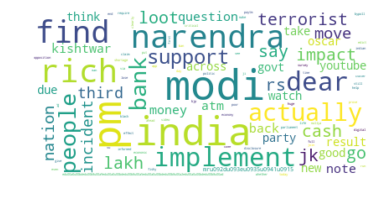

In [53]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",collocations=False).generate(tweet_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("WordCloud_Unigrams_tweet_demonteisation.png")

We can see words like demonetizations, india, pm , narendra and modi. 

The plot gives us a really good idea on what the dataset is about.

But many times unigrams dont help us see the complete picture. **For example**: Given word narendra alone to a lay man - how does he figure out of what it is. Also, there are words like actually and take etc- which ideally do not make sense - we can remove these words by considering only certain POS Tags in the cleaning.

Let us identify, what are the common bigrams that occur. We also see that terrorist is also a word that occurs. 

**As an Excercise : Give a Try what happens if we consider only Nouns and Proper Nouns**




#### Bigrams Word Cloud 

To build Bigrams Word Cloud, we will use the concept of Collocations.Collocations are words the occur together at some frequency. In the document(s) that you analyze you may see the same phrase appear multiple times or it may appear only once.

This allows us to score the Bigrams in multiple ways - using raw frequency or chi square or likelihood ratio. We will use raw_frequency to get the important bigrams hers

In [54]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from operator import itemgetter

def getBigrams(tweet_text):
    tweet_tokens=nltk.word_tokenize(tweet_text)
    
    text=nltk.Text(tweet_tokens)
    
    text=[word for word in text if word!="." and len(word)>1 and word!="'s"]
    
    finder = BigramCollocationFinder.from_words(text)
    
    bigram_measures = BigramAssocMeasures()
    
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    
    scoredList = sorted(scored, key=itemgetter(1), reverse=True)
    
    return scoredList

In [55]:
scoredList=getBigrams(tweet_text)
scoredList

[(('narendra', 'modi'), 0.012475309283709326),
 (('india', 'rich'), 0.011427703183602965),
 (('pm', 'narendra'), 0.011379721224819467),
 (('implement', 'find'), 0.011171799403424313),
 (('rich', 'pm'), 0.011115820451510232),
 (('modi', 'implement'), 0.011075835485857317),
 (('find', 'actually'), 0.010484057994194183),
 (('dear', 'india'), 0.010348109110974274),
 (('actually', 'dear'), 0.006645501291514391),
 (('loot', 'bank'), 0.0049661327340919815),
 (('support', 'pm'), 0.004478316153126424),
 (('lakh', 'loot'), 0.004350364263037098),
 (('40', 'lakh'), 0.004334370276775933),
 (('bank', 'kishtwar'), 0.004334370276775933),
 (('incident', 'since'), 0.004334370276775933),
 (('jk', 'third'), 0.004334370276775933),
 (('kishtwar', 'jk'), 0.004334370276775933),
 (('since', 'terrorist'), 0.004334370276775933),
 (('third', 'incident'), 0.004334370276775933),
 (('rs', '40'), 0.004326373283645349),
 (('go', 'mru092du093eu0935u0941u0915'), 0.002822938575095764),
 (('mru092du093eu0935u0941u0915',
 

We can see that the bigram "narendra modi" occurs the most in that.  We can see that there is news about "Kishtwar" which is a part of Jammu. We also see bigrams like "since terrorist" which we ideally do not want in our list. This can be filtered out, if we only consider few pos tags.  Before we take up that, let us look at the Word Cloud for Bigrams.

To build the bigram, we need to convert the scoring List to a dict, where words in the bigram seperated by a delimiter "_" in our case become the key and the score becomes the value

In [56]:
word_dict={}
listLen=len(scoredList)
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

Text(0.5,1,'frequently occurring bigrams')

(-0.5, 499.5, 499.5, -0.5)

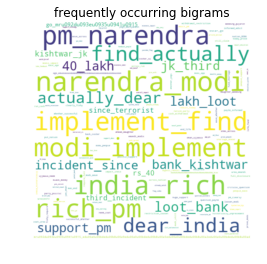

In [57]:
WC_height = 500
WC_width = 500
WC_max_words = 200
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color="white")
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title("frequently occurring bigrams")
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 
wordCloud.to_file("WordCloud_Bigrams_frequent_words.png")

We can see that there are two bigrams "Kishtwar_bank" and "kishtwar_jk" and we can make an guess probably they talk about an bank in Kishtwar which is present in Jammu.Let us now improve this word cloud further. Let us consider only a few POS Tags

#### Improving the Bigram Word Cloud 

In [58]:
allowed_postags=['NOUN', 'PROPN', 'NUM']
tweets['cleaned_text_2']=tweets['cleaned_text'].apply(lambda x:cleanup_text(x,allowed_tags=allowed_postags))

In [59]:
tweets[['text','cleaned_text_2']].head()

,text,cleaned_text_2
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,question paytm pm disclosure …
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,survey app
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…",finsec governor chair harvard professor lambaste aam aadmi th
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,gurugram post office employee cash exchange patient hospital
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,reddy wedding cartoon


In [60]:
tweet_text_2=" ".join(tweets['cleaned_text_2'])


In [61]:
scoredList_2=getBigrams(tweet_text_2)
scoredList_2

[(('modi', 'demonetization'), 0.019785530886573026),
 (('narendra', 'modi'), 0.019744339635594733),
 (('india', 'pm'), 0.019359887959797338),
 (('pm', 'narendra'), 0.01898916670099271),
 (('demonetization', 'india'), 0.015227032444975353),
 (('40', 'lakh'), 0.007441886010078126),
 (('bank', 'kishtwar'), 0.007441886010078126),
 (('incident', 'terrorist'), 0.007441886010078126),
 (('jk', 'incident'), 0.007441886010078126),
 (('kishtwar', 'jk'), 0.007441886010078126),
 (('lakh', 'bank'), 0.007441886010078126),
 (('mru092du093eu0935u0941u0915',
   'edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad'),
  0.004846837198445717),
 (('oscar', 'mru092du093eu0935u0941u0915'), 0.004846837198445717),
 (('pm', 'nation'), 0.0040504730128654),
 (('question', 'paytm'), 0.003968090510908817),
 (('paytm', 'pm'), 0.00391316884293776),
 (('pm', 'disclosure'), 0.0038307863409811757),
 (('people', 'demonetization'), 0.0038170559239884116),
 (('nation', '8086'), 0

We can see there is a string "mru092du093eu0935u0941u0915" in the data. Doesnt look like valid string. Lets check oyt the string

In [62]:
tweets[tweets['cleaned_text'].str.contains("mru092du093eu0935u0941u0915|edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad")]





,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,contains_email,usermentions,cleaned_text_withall_pos,cleaned_text_2
306,307,307,"RT @DrKumarVishwas: And the Oscar goes to ""Mr.<U+092D><U+093E><U+0935><U+0941><U+0915>"" <ed><U+00A0><U+00BD><ed><U+00B8><U+00A9><ed><U+00A0><U+00BD><ed><U+00B8><U+00A5><ed><U+00A0><U+00BD><ed><U+00B8><U+00A2><ed><U+00A0><U+00BD><ed><U+00B8><U+00AD>#demonetization https://t.co/ObQrhlNSL6",False,0,NaN,2016-11-23 17:29:22,False,NaN,8.014778e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",astro121995,954,True,False,and the oscar goes to mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad,0,[@drkumarvishwas],oscar go mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad,oscar mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad
366,367,367,"RT @DrKumarVishwas: And the Oscar goes to ""Mr.<U+092D><U+093E><U+0935><U+0941><U+0915>"" <ed><U+00A0><U+00BD><ed><U+00B8><U+00A9><ed><U+00A0><U+00BD><ed><U+00B8><U+00A5><ed><U+00A0><U+00BD><ed><U+00B8><U+00A2><ed><U+00A0><U+00BD><ed><U+00B8><U+00AD>#demonetization https://t.co/ObQrhlNSL6",False,0,NaN,2016-11-23 17:17:26,False,NaN,8.014748e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",GuptaSantoshLko,954,True,False,and the oscar goes to mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad,0,[@drkumarvishwas],oscar go mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad,oscar mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad
405,406,406,"RT @DrKumarVishwas: And the Oscar goes to ""Mr.<U+092D><U+093E><U+0935><U+0941><U+0915>"" <ed><U+00A0><U+00BD><ed><U+00B8><U+00A9><ed><U+00A0><U+00BD><ed><U+00B8><U+00A5><ed><U+00A0><U+00BD><ed><U+00B8><U+00A2><ed><U+00A0><U+00BD><ed><U+00B8><U+00AD>#demonetization https://t.co/ObQrhlNSL6",False,0,NaN,2016-11-23 17:09:47,False,NaN,8.014728e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",dineshhagrawal,954,True,False,and the oscar goes to mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad,0,[@drkumarvishwas],oscar go mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad,oscar mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad
432,433,433,"RT @DrKumarVishwas: And the Oscar goes to ""Mr.<U+092D><U+093E><U+0935><U+0941><U+0915>"" <ed><U+00A0><U+00BD><ed><U+00B8><U+00A9><ed><U+00A0><U+00BD><ed><U+00B8><U+00A5><ed><U+00A0><U+00BD><ed><U+00B8><U+00A2><ed><U+00A0><U+00BD><ed><U+00B8><U+00AD>#demonetization https://t.co/ObQrhlNSL6",False,0,NaN,2016-11-23 17:04:10,False,NaN,8.014714e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",diwakar1245,954,True,False,and the oscar goes to mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad,0,[@drkumarvishwas],oscar go mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad,oscar mru092du093eu0935u0941u0915 edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad
716,717,717,"RT @DrKumarVishwas: And the Oscar goes to ""Mr.<U+092D><U+093E><U+0935><U+0941><U+0915>"" <ed><U+00A0><U+00BD><e

It is kinf of like HTML tag and must be removed from the data

In [63]:
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:x.replace("edu00a0u00bdedu00b8u00a9edu00a0u00bdedu00b8u00a5edu00a0u00bdedu00b8u00a2edu00a0u00bdedu00b8u00ad",""))
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda x:x.replace("mru092du093eu0935u0941u0915",""))

tweets['cleaned_text_2']=tweets['cleaned_text'].apply(lambda x:cleanup_text(x,allowed_tags=allowed_postags))


In [64]:
tweet_text_2=" ".join(tweets['cleaned_text_2'])
scoredList_2=getBigrams(tweet_text_2)
scoredList_2

[(('modi', 'demonetization'), 0.019979202772963604),
 (('narendra', 'modi'), 0.019937608318890816),
 (('india', 'pm'), 0.019549393414211438),
 (('pm', 'narendra'), 0.019175043327556325),
 (('demonetization', 'india'), 0.015376083188908145),
 (('40', 'lakh'), 0.00751473136915078),
 (('bank', 'kishtwar'), 0.00751473136915078),
 (('incident', 'terrorist'), 0.00751473136915078),
 (('jk', 'incident'), 0.00751473136915078),
 (('kishtwar', 'jk'), 0.00751473136915078),
 (('lakh', 'bank'), 0.00751473136915078),
 (('pm', 'nation'), 0.004090121317157712),
 (('question', 'paytm'), 0.004006932409012132),
 (('paytm', 'pm'), 0.003951473136915078),
 (('pm', 'disclosure'), 0.0038682842287694973),
 (('people', 'demonetization'), 0.003854419410745234),
 (('nation', '8086'), 0.003632582322357019),
 (('8086', 'people'), 0.0036187175043327557),
 (('nation', 'party'), 0.0035632582322357017),
 (('party', 'politic'), 0.0035632582322357017),
 (('politic', 'pm'), 0.0035632582322357017),
 (('demonetization', 'cvo

We can see more themese coming up - about paytm, about yogo wave etc.Let us plot it on a word cloud

In [65]:
word_dict_2={}
listLen=len(scoredList_2)
for i in range(listLen):
    word_dict_2['_'.join(scoredList_2[i][0])] = scoredList_2[i][1]

Text(0.5,1,'frequently occurring bigrams')

(-0.5, 499.5, 499.5, -0.5)

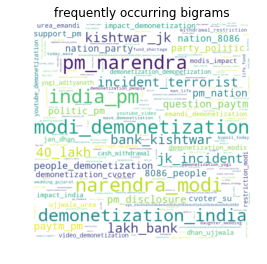

In [66]:
WC_height = 500
WC_width = 500
WC_max_words = 200
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color="white")
 
wordCloud.generate_from_frequencies(word_dict_2)
 
plt.title("frequently occurring bigrams")
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 
wordCloud.to_file("WordCloud_Bigrams_frequent_words_selected_pos.png")

With this we are done with very basic analysis of Text Data. We know the different themese that are occurring in the data. Wouldn't it be nice if we can group the tweets into the different themes?



### Clustering Tweets

In many applications - may be to understand customer groups/behaviour , for targeted advertising and also to understand different opinions it is essential to find similar tweets. While, there are many complex ways to do it, one very simple method is clustering.

Clustering is a concept where the items within a cluster are more closer to each other but are far from item belonging to another cluster.

Like every ML algorithm, machine cannot understand text they understand only numbers. We need to convert the text into numbers. 

The most naive way to do this is called the Bag Of Words Model (BoW). Here for every document (tweet), across the vocabulary in all tweets, we put frequency_of_word_in_tweet  if a word is present in the tweet, else we put a 0. 

This model throws away all of the order information in the words and focuses on the occurrence of words in a document.

Let us use this method to create Document Term Matrix

#### Clustering using BoW




In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:


tweets['cleaned_text_withall_pos']=tweets['cleaned_text'].apply(lambda x:cleanup_text(x,allowed_tags=[]))

For clustering, let us consider the unique tweets. the data contains, retweets at different times as different rows

In [69]:
tweets_2=tweets.drop_duplicates(subset=['cleaned_text'])

In [70]:
tweets_2.shape

(4282, 21)

In [71]:
text=tweets_2['cleaned_text_withall_pos'].tolist()

In [72]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
#print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

(4282, 7085)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


There are 4282 unique tweets and 7059 words in the vocabulary. The matrix is very sparse - lot of zeros seen

In [73]:
from sklearn.cluster import KMeans

In [74]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vector)
    Sum_of_squared_distances.append(km.inertia_)

Text(0.5,0,'k')

Text(0,0.5,'Sum_of_squared_distances')

Text(0.5,1,'Elbow Method For Optimal k')

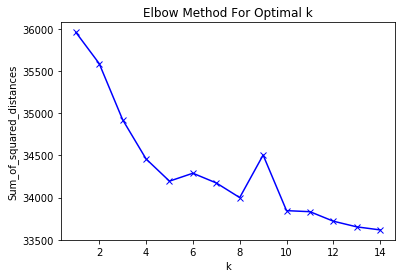

In [75]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Around 5 seems to be a good number of cluster

In [76]:
kmeans = KMeans(n_clusters=7).fit(vector)

In [77]:
tweets_2['BoW_Clusters']=kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [78]:
tweets_2['BoW_Clusters'].value_counts()

0    2456
5    1308
3    269 
2    199 
6    46  
1    3   
4    1   
Name: BoW_Clusters, dtype: int64

Cluster 0 seems to have most of the tweets

In [134]:
tweets_2[tweets_2['BoW_Clusters']==3].head(30)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,contains_email,usermentions,cleaned_text_withall_pos,cleaned_text_2,BoW_Clusters,TfIdf_Clusters
11,12,12,RT @Joydas: Question in Narendra Modi App where PM is taking feedback if people support his #DeMonetization strategy https://t.co/pYgK8Rmg7r,False,0,NaN,2016-11-23 18:37:25,False,NaN,8.014949e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",MonishGavand,120,True,False,question in narendra modi app where pm is taking feedback if people support his strategy,0,[@joydas],question narendra modi app pm take feedback people support strategy,question app pm feedback people strategy,3,3
65,66,66,RT @ModiBharosa: Huge support for PM @narendramodi ’s #demonetization Move Across the Nation \r\n80-86% people back demonetization: C-voter su…,False,0,NaN,2016-11-23 18:20:40,False,NaN,8.014907e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",BsBaban,270,True,False,huge support for pm ’s move across the nation \r\n8086 people back demonetization cvoter su…,0,"[@modibharosa, @narendramodi]",huge support pm 's move across nation 8086 people back demonetization cvoter su …,support pm 's nation 8086 people demonetization cvoter su,3,3
76,77,77,RT @Currency_crisis: What #demonetization indicates is loss of freedom\r\nBesides laws/constitution/court/cops 2 govern people\r\ngovt is using m…,False,0,NaN,2016-11-23 18:16:40,False,NaN,8.014897e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",everG3,1,True,False,what indicates is loss of freedom\r\nbesides lawsconstitutioncourtcops 2 govern people\r\ngovt is using m…,0,[@currency_crisis],indicate loss freedom besides lawsconstitutioncourtcop 2 govern people govt use m …,loss freedom lawsconstitutioncourtcop 2 people govt m,3,2
101,102,102,What #demonetization indicates is loss of freedom\r\nBesides laws/constitution/court/cops 2 govern people\r\ngovt is using money 2 control people,False,0,NaN,2016-11-23 18:10:14,False,NaN,8.014880e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Currency_crisis,1,False,False,what indicates is loss of freedom\r\nbesides lawsconstitutioncourtcops 2 govern people\r\ngovt is using money 2 control people,0,[],indicate loss freedom besides lawsconstitutioncourtcop 2 govern people govt use money 2 control people,loss freedom lawsconstitutioncourtcop 2 people govt money 2 control people,3,4
129,130,130,RT @karnataka_ioc: @indianoilcl giving cash through Mini ATMs to people in Hinterland. #IndiaKaDil. Helping rural people in #Demonetization…,False,0,NaN,2016-11-23 18:05:41,False,NaN,8.014869e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",ioclpunjab,18,True,False,giving cash through mini atms to people in hinterland helping rural people in,0,"[@karnataka_ioc, @indianoilcl]",give cash mini atms people hinterland help rural people,cash atms people hinterland people,3,9
171,172,172,RT @_Hinduism_: How come those people crying for line in banks are not crying for line ups here in......\r\n\r\n#demonetization https://t.co/ixY1…,False,0,NaN,2016-11-23 17:57:21,False,NaN,8.014848e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",zasambhu,22,True,False,how come those people crying for line in banks are not crying for line ups here in,0,[@_hinduism_],come people cry line bank cry line,people line bank line,3,10
224,225,225,RT @rishibagree: This is exactly how some people behaving on #demonetization \r\n\r\nSince Modi Did it lets oppose it\r\nIf Sonia Gandhi have done i…,False,0,NaN,2016-11-23 17:48:33,False,NaN,8.014826e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",sainath_kits,120,True,False,this is exactly ho

Cluster 3 seems to predominatly talk about constitution. 

We can this using this method , there is one cluster which is predominant. Has more than 70% of the tweets in it. 

This is a very naive model. Using BoW model, a word like "the" which occurs many times in a document is given more importance, but it ideally is not an important word. To have this we use Tf_IDF.

Let us build a TF-IDF model and apply clustering. Even this method does not take it consideration the order of the words

#### Clustering using TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:

# create the transform
tfidf_vectorizer = TfidfVectorizer()
# tokenize and build vocab
tfidf_vectorizer.fit(text)
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
tfidf_vector = tfidf_vectorizer.transform(text)
# summarize encoded vector
print(tfidf_vector.shape)
print(tfidf_vector.toarray())

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

(4282, 7085)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


This is also a sparse matrix. 

In [82]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tfidf_vector)
    Sum_of_squared_distances.append(km.inertia_)

Text(0.5,0,'k')

Text(0,0.5,'Sum_of_squared_distances')

Text(0.5,1,'Elbow Method For Optimal k using TF-IDF')

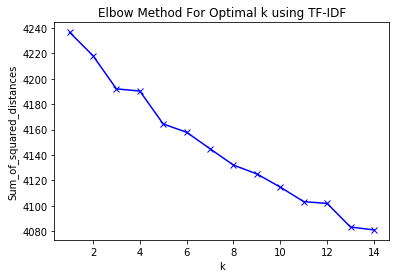

In [83]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k using TF-IDF')
plt.show()

In [84]:
kmeans_tfidf = KMeans(n_clusters=12).fit(tfidf_vector)

In [85]:
tweets_2['TfIdf_Clusters']=kmeans_tfidf.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [86]:
tweets_2['TfIdf_Clusters'].value_counts()

2     1590
11    846 
9     378 
0     295 
4     263 
8     245 
3     171 
10    121 
5     114 
7     111 
6     103 
1     45  
Name: TfIdf_Clusters, dtype: int64

In [87]:
tweets_2[tweets_2['TfIdf_Clusters']==3].head(20)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,contains_email,usermentions,cleaned_text_withall_pos,cleaned_text_2,BoW_Clusters,TfIdf_Clusters
8,9,9,"RT @sumitbhati2002: Many opposition leaders are with @narendramodi on the #Demonetization \r\nAnd respect their decision,but support oppositio…",False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",sumitbhati2002,1,True,False,many opposition leaders are with on the \r\nand respect their decisionbut support oppositio…,0,"[@sumitbhati2002, @narendramodi]",many opposition leader respect decisionbut support oppositio …,opposition leader decisionbut …,0,3
10,11,11,"Many opposition leaders are with @narendramodi on the #Demonetization \r\nAnd respect their decision,but support opposition just b'coz of party",False,1,NaN,2016-11-23 18:37:47,False,NaN,8.014950e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",sumitbhati2002,1,False,False,many opposition leaders are with on the \r\nand respect their decisionbut support opposition just bcoz of party,0,[@narendramodi],many opposition leader respect decisionbut support opposition bcoz party,opposition leader decisionbut support opposition bcoz party,0,3
11,12,12,RT @Joydas: Question in Narendra Modi App where PM is taking feedback if people support his #DeMonetization strategy https://t.co/pYgK8Rmg7r,False,0,NaN,2016-11-23 18:37:25,False,NaN,8.014949e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",MonishGavand,120,True,False,question in narendra modi app where pm is taking feedback if people support his strategy,0,[@joydas],question narendra modi app pm take feedback people support strategy,question app pm feedback people strategy,3,3
49,50,50,RT @Punitspeaks: Survey result so far by @PMOIndia on #Demonetization. 5 lakh response in 24 hrs. 90% supports note ban. #MeraDeshBadalRaha…,False,0,NaN,2016-11-23 18:24:23,False,NaN,8.014916e+17,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",smsivanesan,30,True,False,survey result so far by on 5 lakh response in 24 hrs 90 supports note ban,0,"[@punitspeaks, @pmoindia]",survey result far 5 lakh response 24 hrs 90 support note ban,survey result 5 lakh response 24 hrs 90 support note ban,0,3
58,59,59,RT @pGurus1: CPI-M opposes Co-op Banks in West Bengal but supports them in Kerala! Y Pawar U-turned on #Demonetization https://t.co/ThzaV7r…,False,0,NaN,2016-11-23 18:22:44,False,NaN,8.014912e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",InnovativeHindu,29,True,False,cpim opposes coop banks in west bengal but supports them in kerala y pawar uturned on,0,[@pgurus1],cpim oppose coop bank west bengal support kerala y pawar uturned,cpim coop bank west kerala pawar,0,3
63,64,64,"RT @pGurus1: #Demonetization move of Modi; Who is supporting it, who is opposing it and why? A complete coverage of all parties - https://t…",False,0,NaN,2016-11-23 18:22:05,False,NaN,8.014910e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",InnovativeHindu,19,True,False,move of modi who is supporting it who is opposing it and why a complete coverage of all parties,0,[@pgurus1],move modi support oppose complete coverage party,move modi coverage party,0,3
65,66,66,RT @ModiBharosa: Huge support for PM @narendramodi ’s #demonetization Move Across the Nation \r\n80-86% people back demonetization: C-voter su…,False,0,NaN,2016-11-23 18:20:40,False,NaN,8.014907e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",BsBaban,270,True,False,huge support for pm ’s move across the nation \r\n8086 people back demonetization cvoter su…,0,"[@modibharosa,

 Cluster 3 seems to talk about who is supporting and opposing Narendra Modi

This clusters talks about impact of demonetixation on India.
As we saw, even simple approaches are able to give us pretty good clusters.

The TF-IDF method may be a simple approach, but this is the secret sauce behind Elastic Search Success. Unlike BoW TF-IDF givs iportance to words

The next step to this is to create Word Embeddings - they are dense vectors and capture the semantic relationship between words.
TF-IDF or BoW cannot distinguish between the "river bank" and "hdfc bank" but word vectors or embeddings can. 

So let us get a small understanding of how Word Vectors work and use them for Clustering



###  Creating Word EMbeddings using Word2Vec

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. They are dense and capture the semantic relationship between words. In python, gensim is the most commonly used Word Embeddings. For Building word embeddings in our case, we will use the cleaned_text - where we have removed urls, #hashtags and user mentions

In [89]:
from gensim.models import Word2Vec

##### The text given to word2vec as input must be tokenised

In [90]:
tweets_no_dup=tweets.drop_duplicates(['cleaned_text'])
tweets_text=tweets_no_dup['cleaned_text'].tolist()

In [91]:
tweets_no_dup.shape

(4282, 21)

In [92]:
tweets_text[0:10]

['critical question was paytm informed about  edict by pm its clearly fishy and requires full disclosure …',
 'did you vote on  on modi survey app',
 'former finsec rbi dy governor cbdt chair  harvard professor lambaste \r\n\r\nif not for aam aadmi listen to th…',
 'gurugram haryana post office employees provide cash exchange to patients in hospitals',
 'reddy wedding  cartoon',
 'india’s   a symptom not the disease  via',
 'rs 40 lakh looted from a bank in kishtwar in jk third such incident since  thats how terrorists have…',
 'calling all nationalists to join\r\nwalk for  and spread the benefits of  among the mas…',
 'many opposition leaders are with  on the  \r\nand respect their decisionbut support oppositio…',
 'national reform now destroyed even the essence of sagan such instances urge giving  a second though…']

In [93]:
nlp = spacy.load("en")


In [94]:
def tokenise(docs):
    texts = []
    
    words_remove=["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was","demonetization"]
    doc = nlp(docs, disable=['parser', 'ner'])
    
    tokens = [tok.lemma_ for tok in doc if tok.lemma_ != '-PRON-']
    
    tokens = [tok.lower().strip() for tok in tokens if tok.lower() not in STOPWORDS and tok!=" " and tok.lower()not in words_remove]
    
    tokens=[tok for tok in tokens if tok!="" and tok!="…"]
    
    return tokens

In [95]:
tokenise(tweets_text[0])

['critical',
 'question',
 'paytm',
 'informed',
 'edict',
 'pm',
 'clearly',
 'fishy',
 'require',
 'full',
 'disclosure']

In [96]:
tweets_cleaned=[tokenise(text) for text in tweets_text]

In [97]:
model = Word2Vec(tweets_cleaned, size=100, window=10, min_count=1, workers=4)

In [98]:
model.save("word2vec_tweet.model")


In [99]:
model.wv.most_similar("pm")

[('modi', 0.998772144317627),
 ('india', 0.998707115650177),
 ('people', 0.9985541105270386),
 ('bank', 0.9985122680664062),
 ('bjp', 0.9985113143920898),
 ('now', 0.9984845519065857),
 ('support', 0.9983962774276733),
 ('cash', 0.9983828663825989),
 ('think', 0.9983372092247009),
 ('govt', 0.9983102083206177)]

In [100]:
model.wv.most_similar("black")

[('bank', 0.998084545135498),
 ('now', 0.9979954361915588),
 ('india', 0.9979515075683594),
 ('money', 0.9979445934295654),
 ('go', 0.9978599548339844),
 ('people', 0.9977654218673706),
 ('give', 0.997692346572876),
 ('2', 0.9976750612258911),
 ('take', 0.9976242780685425),
 ('use', 0.9976049661636353)]

Another important applicatiof NLP in Business is Sentiment Analysis
For simple sentence Sentiment Analysis like "The product was good", BoW or TF-IDF Model may suffice.But for sentences like "The quality of the battery was good but the phone was heavy", we may need to extract sentiments about different aspects of the product.

We have SentimentAnalyser function in python, which can give u the polarity of a document, but aspect based sentiment analysis, may require syntactic and semnatic understanding of the text

### Sentiment Analysis

Let us use NLTK Sentiment Analyser to get the sentiment of tweets

In [101]:
from nltk.sentiment import vader
from nltk.sentiment.util import *

from nltk import tokenize

sid = vader.SentimentIntensityAnalyzer()

In [102]:
tweets['sentiment_compound_polarity']=tweets['text'].apply(lambda x:sid.polarity_scores(x)['compound'])

tweets['sentiment_negative']=tweets['text'].apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets['text'].apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment']=''
tweets.loc[tweets.sentiment_compound_polarity>=0,'sentiment']="positive"
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment']="neutral"

tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment']="negative"

In [103]:
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,contains_email,usermentions,cleaned_text_withall_pos,cleaned_text_2,sentiment_compound_polarity,sentiment_negative,sentiment_pos,sentiment
0,1,1,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",HASHTAGFARZIWAL,331,True,False,critical question was paytm informed about edict by pm its clearly fishy and requires full disclosure …,0,[@rssurjewala],critical question paytm informed edict pm clearly fishy require full disclosure …,question paytm pm disclosure …,0.1027,0.1,0.117,positive
1,2,2,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",PRAMODKAUSHIK9,66,True,False,did you vote on on modi survey app,0,[@hemant_80],vote modi survey app,survey app,0.0000,0.0,0.000,neutral
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",rahulja13034944,12,True,False,former finsec rbi dy governor cbdt chair harvard professor lambaste \r\n\r\nif not for aam aadmi listen to th…,0,[@roshankar],former finsec rbi dy governor cbdt chair harvard professor lambaste aam aadmi listen th …,finsec governor chair harvard professor lambaste aam aadmi th,0.0000,0.0,0.000,neutral
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",deeptiyvd,338,True,False,gurugram haryana post office employees provide cash exchange to patients in hospitals,0,[@ani_news],gurugram haryana post office employee provide cash exchange patient hospital,gurugram post office employee cash exchange patient hospital,0.0000,0.0,0.000,neutral
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow"">CPIMBadli</a>",CPIMBadli,120,True,False,reddy wedding cartoon,0,"[@satishacharya, @mail_today]",reddy wedding cartoon,reddy wedding cartoon,0.0000,0.0,0.000,neutral


In [104]:
tweets['sentiment'].value_counts()

positive    6574
neutral     4434
negative    3932
Name: sentiment, dtype: int64

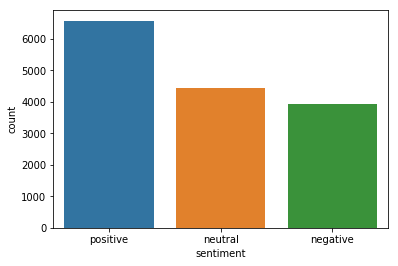

In [132]:
sns.countplot(tweets['sentiment'])

In [105]:
tweets[tweets['sentiment']=="negative"].head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,contains_email,usermentions,cleaned_text_withall_pos,cleaned_text_2,sentiment_compound_polarity,sentiment_negative,sentiment_pos,sentiment
6,7,7,RT @gauravcsawant: Rs 40 lakh looted from a bank in Kishtwar in J&amp;K. Third such incident since #demonetization. That's how terrorists have…,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",bhodia1,637,True,False,rs 40 lakh looted from a bank in kishtwar in jk third such incident since thats how terrorists have…,0,[@gauravcsawant],rs 40 lakh loot bank kishtwar jk third incident s terrorist …,40 lakh bank kishtwar jk incident terrorist,-0.6249,0.170,0.000,negative
9,10,10,National reform now destroyed even the essence of sagan. Such instances urge giving #demonetization a second though… https://t.co/eyySIREiUq,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",HelpIndia2016,0,False,False,national reform now destroyed even the essence of sagan such instances urge giving a second though…,0,[],national reform now destroy even essence sagan instance urge give second though …,reform essence sagan instance,-0.2023,0.155,0.117,negative
12,13,13,@Jaggesh2 Bharat band on 28??<ed><U+00A0><U+00BD><ed><U+00B8><U+0082>Those who are protesting #demonetization are all different party leaders.,False,0,Jaggesh2,2016-11-23 18:37:15,False,8.014821e+17,8.014948e+17,1.225925e+09,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",yuvaraj_karki,0,False,False,bharat band on 28edu00a0u00bdedu00b8u0082those who are protesting are all different party leaders,0,[@jaggesh2],bharat band 28edu00a0u00bdedu00b8u0082those protest different party leader,bharat band 28edu00a0u00bdedu00b8u0082those party leader,-0.1179,0.177,0.151,negative
15,16,16,RT @Dipankar_cpiml: The Modi app on #DeMonetization proves once again that the govt is totally indifferent to the mounting misery and hards…,False,0,NaN,2016-11-23 18:35:22,False,NaN,8.014944e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",aazaadparinda,45,True,False,the modi app on proves once again that the govt is totally indifferent to the mounting misery and hards…,0,[@dipankar_cpiml],modi app prove govt totally indifferent mount misery hard …,app govt misery hard,-0.6997,0.225,0.000,negative
26,27,27,"RT @kapil_kausik: #Doltiwal I mean #JaiChandKejriwal is ""hurt"" by #Demonetization as the same has rendered USELESS <ed><U+00A0><U+00BD><ed><U+00B1><U+0089> ""acquired funds"" No wo…",False,0,NaN,2016-11-23 18:32:41,False,NaN,8.014937e+17,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",mrx565,20,True,False,i mean is hurt by as the same has rendered useless edu00a0u00bdedu00b1u0089 acquired funds no wo…,0,[@kapil_kausik],mean hurt render useless edu00a0u00bdedu00b1u0089 acquire fund wo …,edu00a0u00bdedu00b1u0089 fund,-0.6940,0.242,0.000,negative


#### Over time how has the sentiment of people changed?

In [106]:
tweets['created_date']=pd.to_datetime(tweets['created'])

In [119]:
tweets['date'] = pd.DatetimeIndex(tweets['created']).date

In [120]:
tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour

In [121]:
tweets_date_sentiment=tweets.groupby(['hour','sentiment']).size().reset_index().rename(columns={0:'num_tweets'})

In [124]:
import seaborn as sns

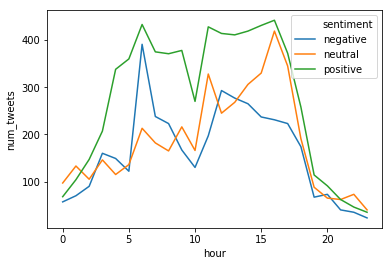

In [129]:
sns.lineplot(x='hour',y='num_tweets',data=tweets_date_sentiment,hue='sentiment')

In [130]:
tweets_hour_polarity=tweets.groupby(['hour'])['sentiment_compound_polarity'].mean().reset_index()

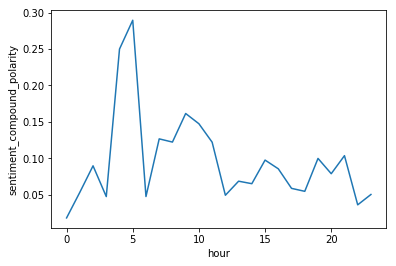

In [131]:
sns.lineplot(x='hour',y='sentiment_compound_polarity',data=tweets_hour_polarity)

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here